In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


### Let's check the distribution of the columns 

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


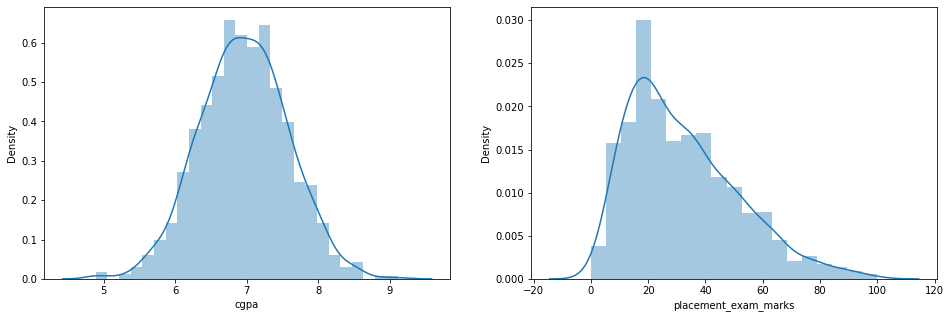

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

### Here IQR method is used to detect outliers in the Skewed Data 
- So let's perform all the things on the placement_exams_marks

C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

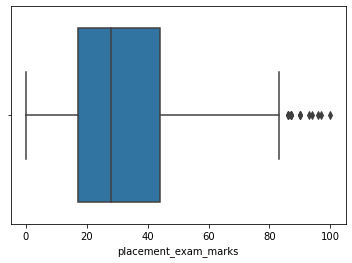

In [5]:
## Here we got outliers at the right Side
sns.boxplot(df['placement_exam_marks'])

## What is IQR(Interquartile Range)?
The box plot show us the value in percentile form 
### The range between 25 to 75 percentile is known as IQR and this can be find by subtracting the 25 percentile from 75 percentile
#### formula : Q3 (75 percentile) - Q1 (25 percentile)
- zero percentile is the min value
- 100 percentile is max value 
- the mid of box plot is 50 percentile which is also known as median 
- We have viscors (The black lines at the side) so the point next to the viscors are considered as outliers 
### The formula to find the viscors:
- minimum (Q1 - 1.5 * IQR)
- maximum (Q3 + 1.5 * IQR)

## let's find the IQR and min and max viscor value for the second column 

In [6]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

### IQR

In [7]:
iqr = 44-17 
iqr

27

### minmum and maximum viscor 

In [9]:
minimum = 17 - (1.5 *iqr)
maximum = 44 + (1.5 *iqr)

In [10]:
print('The upper limit is :', minimum)
print('The lower limit is :', maximum)

The upper limit is : -23.5
The lower limit is : 84.5


### Now let's find the outliers

In [11]:
df[df['placement_exam_marks'] > maximum]d

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [12]:
df[df['placement_exam_marks'] < minimum]

,cgpa,placement_exam_marks,placed


# Trimming 

In [13]:
new_df = df[(df['placement_exam_marks'] < maximum) & (df['placement_exam_marks'] > minimum)]
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [14]:
new_df.shape

(985, 3)

### Now let's plot after trimming 

C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


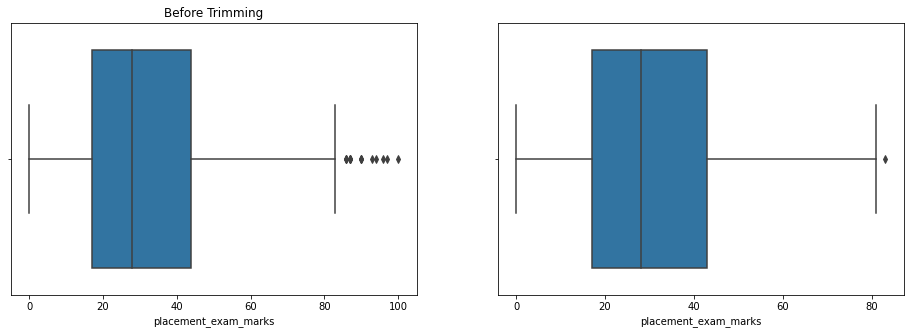

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])
plt.title("Before Trimming")

plt.subplot(1,2,2)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

### Now plot the distribution plot 
- In the second graph, we don't see values at the tail bcz these values got trimmed 

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


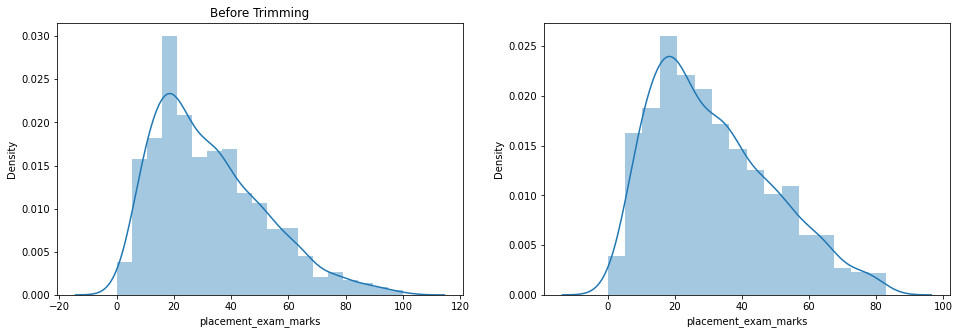

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])
plt.title("Before Trimming")

plt.subplot(1,2,2)
sns.distplot(new_df['placement_exam_marks'])

plt.show()

# Capping 

In [17]:
df['Capped_placement_marks'] = np.where(df['placement_exam_marks'] > maximum, maximum, np.where(df['placement_exam_marks']< minimum, minimum, df['placement_exam_marks']))

In [18]:
df.head()

,cgpa,placement_exam_marks,placed,Capped_placement_marks
0,7.19,26.0,1,26.0
1,7.46,38.0,1,38.0
2,7.54,40.0,1,40.0
3,6.42,8.0,1,8.0
4,7.23,17.0,0,17.0


### Let's display the box plot 

C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


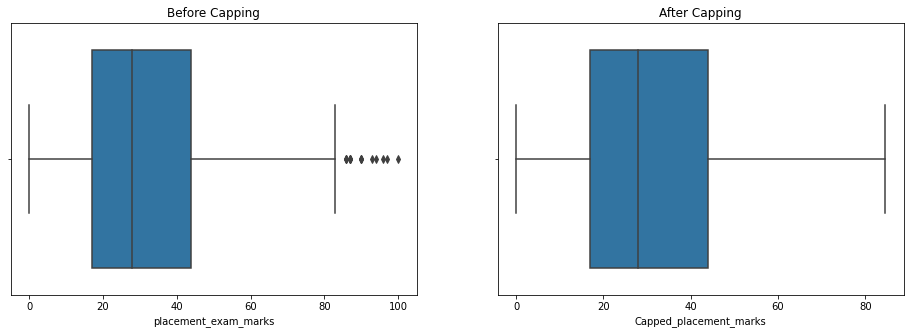

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])
plt.title("Before Capping")

plt.subplot(1,2,2)
sns.boxplot(df['Capped_placement_marks'])
plt.title("After Capping")

plt.show()

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


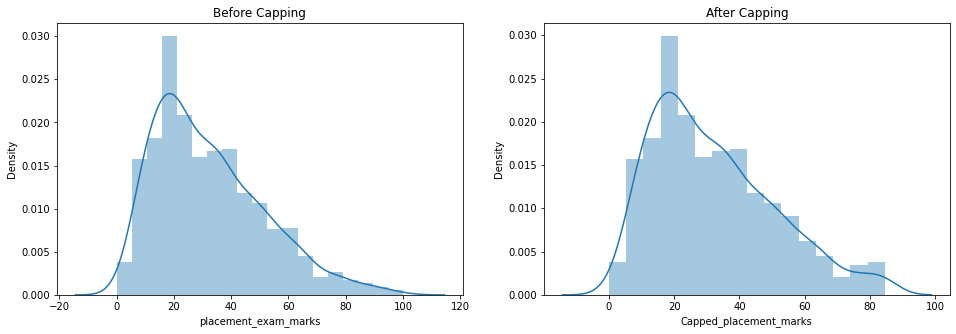

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])
plt.title("Before Capping")

plt.subplot(1,2,2)
sns.distplot(df['Capped_placement_marks'])
plt.title("After Capping")

plt.show()